# 1. First steps

______________

Importing Libraries.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

from typing import List, Tuple, Literal, Dict
from itertools import combinations, product

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [80]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

df = pd.concat([X, y], axis=1)
df.to_csv("dataset.csv")

# 2. Getting acquainted with data

_________________

- Categorical features:
   - *age*
   - *trestbps* - resting blood pressure /*mm Hg* (on admission to the hospital)
   - *chol* - serum cholesterol in *mg/dl*
   - *thalach* - Maximum heart rate achieved /*bps*
   - *oldpeak* -  ST depression induced by exercise relative to rest 
   - *ca* - Number of major vessels (0-3) colored by fluoroscopy

- Integer features:
   - *sex* 
       - 0: female
       - 1: male
   - *cp* - chest pain
       - 1: typical angina
       - 2: atypical angina
       - 3: non-anginal pain
       - 4: asymptomatic
   - *fbs* - fasting blood sugar > 120 mg/dl
       - 0: False
       - 1: True
   - *restecg* - Resting electrocardiographic results
       - 0: Normal
       - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
   - *exang* - Exercise induced angina
       - 0: No
       - 1: Yes
   - *slope* - The slope of the peak exercise ST segment
       - 1: Up sloping
       - 2: Flat
       - 3: Down sloping
   - *thal*
       - 3: Normal
       - 6: Fixed defect
       - 7: Reversible defect
- Label
    - *num* - The final diagnosis of heart disease (angiographic disease status)

##### The information was taken from:
Nassif A. (et al). 2018. Machine Learning Classifications of Coronary Artery Disease. DOI: 10.1109/iSAI-NLP.2018.8692942

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [83]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [84]:
# checking the number of missing values in each feature
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [85]:
# number of samples per class
df.num.value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

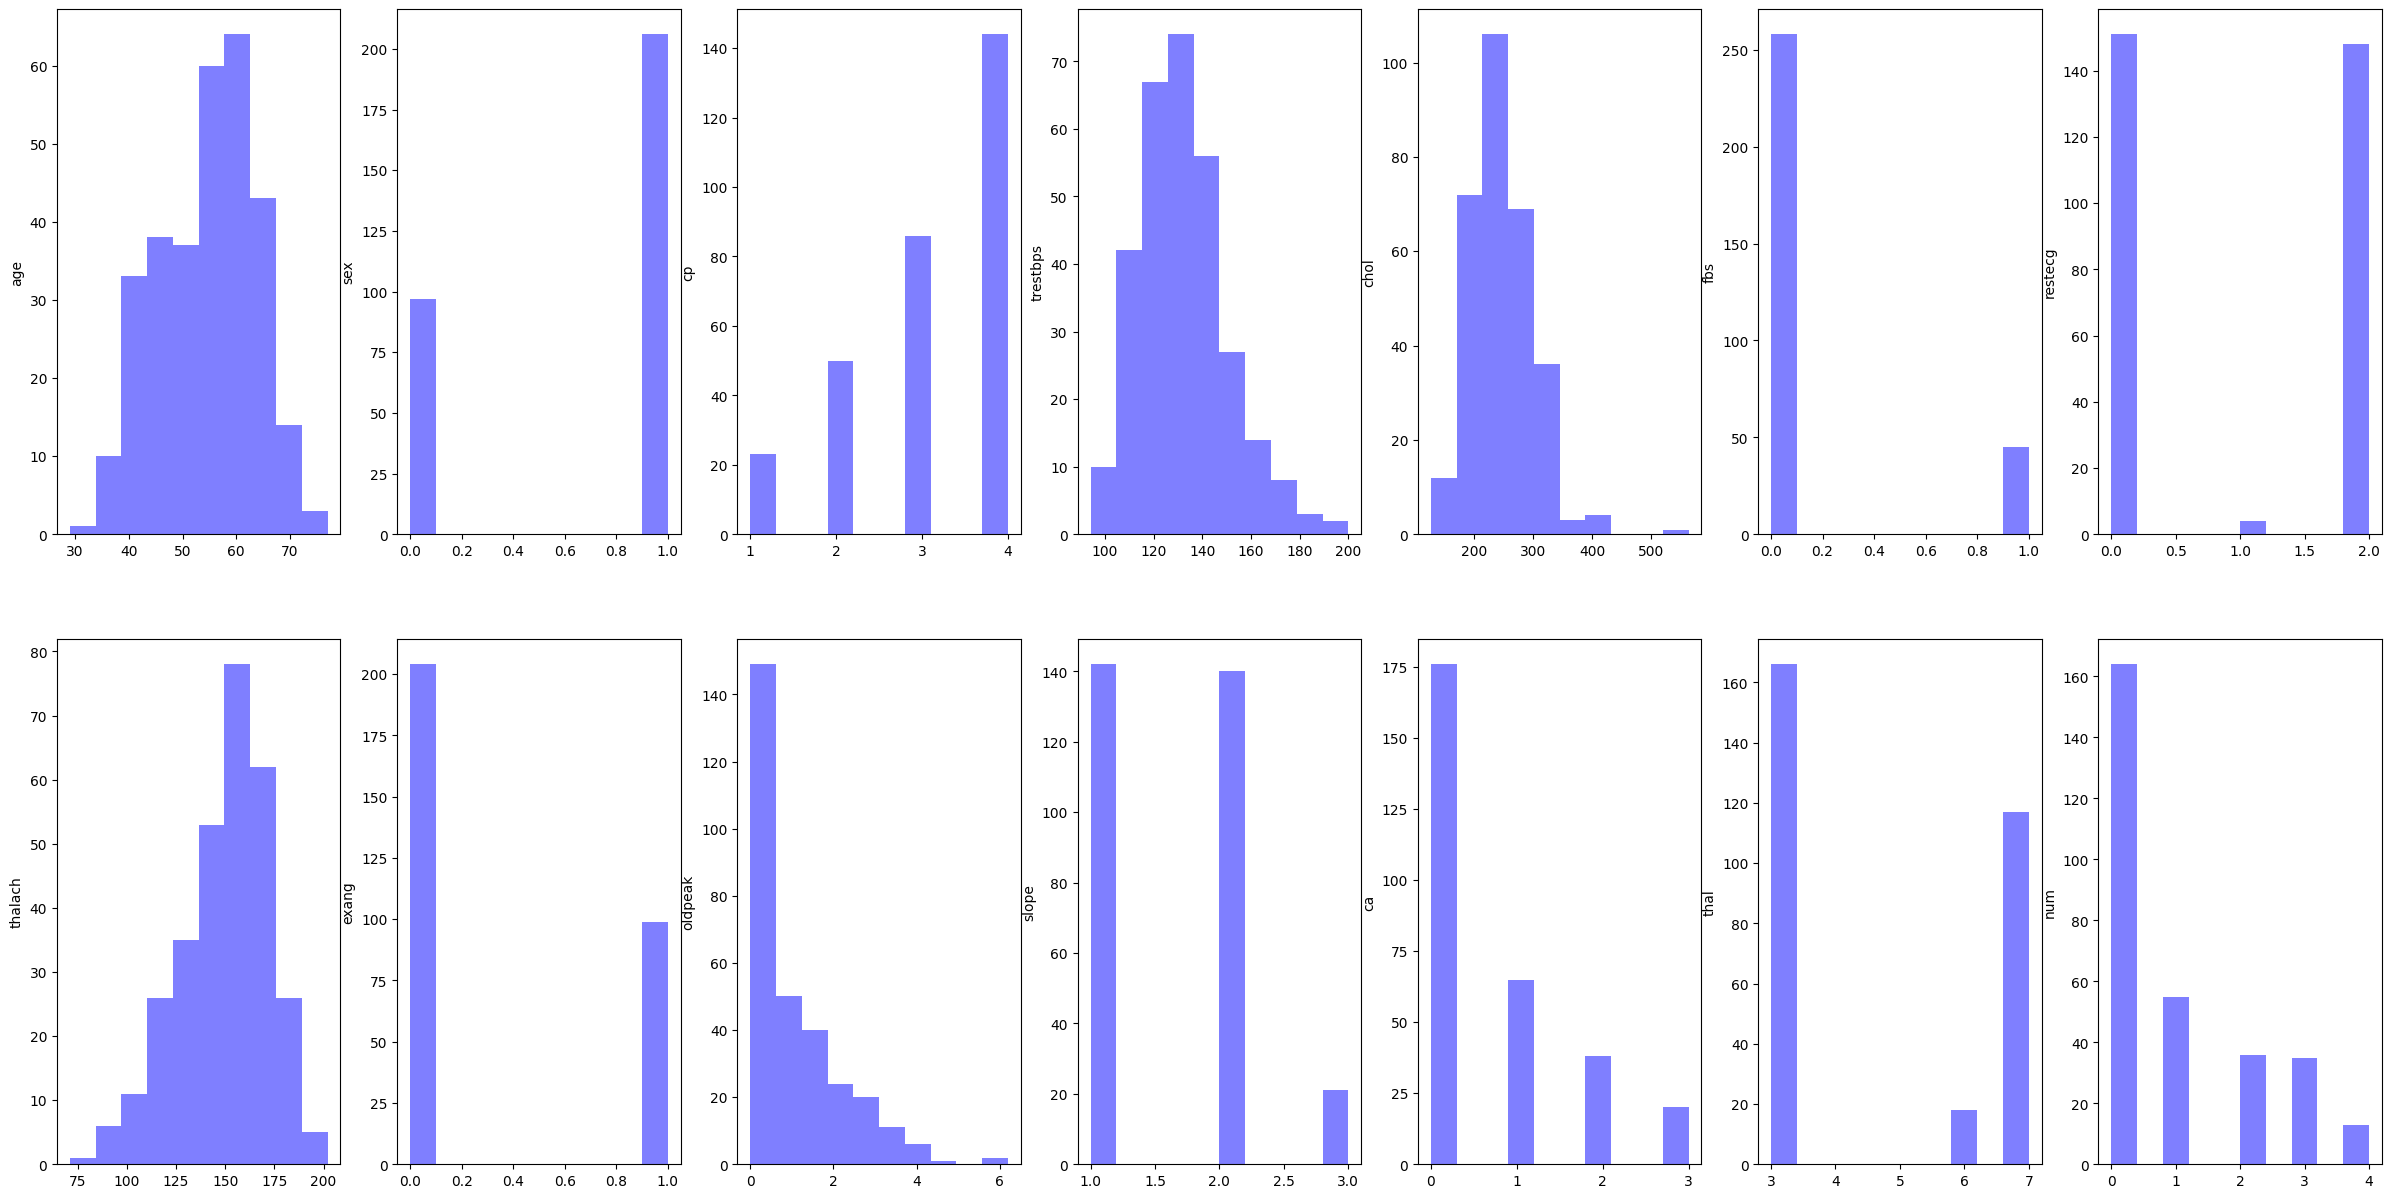

In [86]:
nrows = 2
ncols = int(np.ceil(len(df.columns) / (1.0*nrows)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 15))
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]
        if counter < len(df.columns):

            ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5)
            ax.set_ylabel(df.columns[counter])

        else: ax.set_axis_off()
        counter += 1

# 3. Breaf data cleaning

_______________

Data is already pretty clean, and there are only 6 NaN values, so we can drop those observations.

### 3.1 Dropping NaN values

_________________

In [87]:
df = df.dropna()
# re-checking the number of samples per class adfer dropping missing values
df.num.value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

- As we can see, the NaN values were part of the classes with more observations, therefore droppins NaN values does not worsen the class imbalance problem.

- Since we only have 13 samples from the class with least amount of samples (y = 4), we cannot afford taking some samples as testing set, because we would loose valuable information. Therefore, we are going to work only with training and validation sets.

### 3.2 Separating a dataset for testing (*client data*)

______________

The traditional approach for splitting the dataset into train+validation+test is 60%+20%+20%.

In [88]:
# dataset to be reserved for future testing (client role)
# making sure we have 20% from every class
client_set = df.copy().groupby('num').apply(lambda Class: Class.sample(frac = 0.20))
client_set.index = client_set.index.droplevel(0)

# new data frame for creaing and testing models
df_filtered = df.copy().drop(client_set.index)

# reseting indices
client_set = client_set.reset_index(drop=True)
df_filtered = df_filtered.reset_index(drop=True)

Text(0.5, 1.0, 'Data Set')

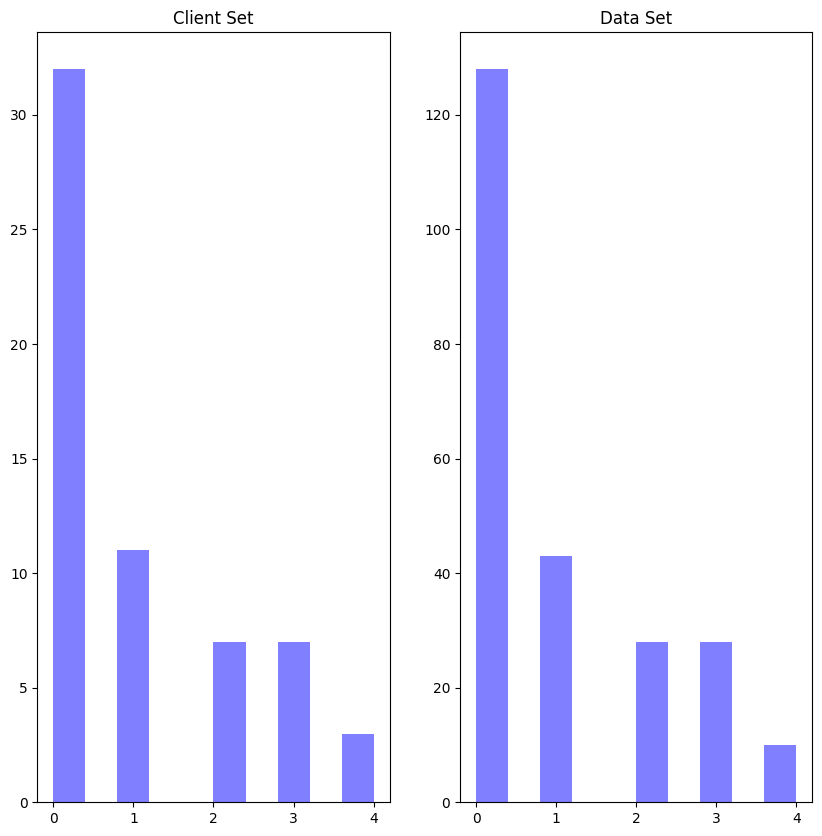

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].hist(client_set.num, bins=10, color='blue', alpha=0.5)
axes[0].set_title("Client Set")
axes[1].hist(df_filtered.num, bins=10, color='blue', alpha=0.5)
axes[1].set_title("Data Set")

# 4. Feature Selection

__________

### 4.1 Features selection by correlation elimination

___________

We are using Spearman's correlation instead of Pearson's because practically all features don't have a normal distribution (as seen in the histograms above) and Spearman's is more robust to outliers.

Nassif et al. (2018; 10.1109/iSAI-NLP.2018.8692942) also applied correlation evaluation, but did not use Spearman's correlation.

Creating a function that selects features according correlation. The arguments of the function (1) the dataframe, (2) the correlation method, and (3) the correlation threshold for feature elimination.

In [90]:
def Corr_selection(df: pd.DataFrame, corr_method: str = 'spearman', threshold: float = 0.2) -> List:

    """This function selects the features to be eliminate according to a correlation threshold.
    
    Args:
        df: Dataframe - Dataset containing all data.
        corr_method: str - Which method to apply to calculate the correlation. Default is 'spearman'.
        threshold: float - a limit between 0 and 1. Default is 0.2.
    Return:
        a list value, containing the selected features.
        
    """
    corr_matrix = X.corr(method=corr_method)
    # covert corr_matrix to absolute values
    corr_matrix = np.array(abs(corr_matrix))
    # all features available
    features = np.array(df.columns)
    # list of features to eliminate
    to_eliminate = []
    # runs all lines
    for i in range(len(features)):
        # runs all columns
        for j in range(len(features)):
            
            if corr_matrix[i,j] > threshold and corr_matrix[i,j] != 1: 
                
                if np.mean(corr_matrix[i,:]) > np.mean(corr_matrix[:,j]): to_eliminate.append(features[i])
                else: to_eliminate.append(features[j])
    
    to_eliminate = np.unique(to_eliminate)
    selected_features = list( features[~np.isin(features, to_eliminate)] )
    return [selected_features]

### 4.2 Features selection by information gain

__________

Creating a function that selects features according to Mutual Information Gain. 

References:
- Nassif et al. (2018; 10.1109/iSAI-NLP.2018.8692942)
- Guhanesvar. *Feature Selection Based on Mutual Information Gain for Classification and Regression*. Medium. June 26, 2021.

In [91]:
def InfoGain_selection(X: pd.DataFrame, y: pd.DataFrame, n_features: int) -> Tuple[pd.Series, List]:

    """This function selects n_features according that have the greatest mutual information classification.

    Args:
        X: Dataframe - Dataset containing all data.
        y: Dataframe - Dataset containing all target data.
        n_features: int - Number of features to select.
    Return:
        a tuple of a Series and a list, of the importance and the selected features.
    """
    
    importance = mutual_info_classif(X, y)
    importance = pd.Series(data = importance, index = X.columns)
    importance = importance.sort_values(ascending=False)
    selected_features = list(importance.iloc[:n_features].index)
    return importance, [selected_features]

### 4.3 Data selection by permutations (3 features)

___________

In [92]:
def feature_combination(X: pd.DataFrame, comb: int = 3):
    
    """This function returns a dataframe with all possible permutations.

    Args:
        X: Dataframe - Dataset containing all data.
        comb: int - length of subsequence of elements. Default is 3.
    Rerturn:
        a list value, containing all combinations of the columns of the Dataframe with a selected length of subsequence.
        
    """
    
    return list(combinations(X.columns, comb))

# 5. Class imbalance

_____________

As seen in the histogram of Fig. 14, there are many more samples with label 0 than with other labels. Therefore, class imbalance has to be dealt with. According to Hoffman [1], there are several ways to reduce class imbalance, such as using other performance metrics when assessing performance (precision, recall, F1 score, and confusion matrix), performing over-sampling (when the dataset is reletively small), or using the Synthetic Minority Over-sampling Technique (SMOTE) algorithm to create synthetic samples.

BUT, according to this video https://www.youtube.com/watch?v=adHqzek--d0, on stamp 3:52, the SMOTE technique is not good for multidimensional data (which is the one we have here)

REFERENCE [1]: K. Hoffman. *Machine Learning: How to Handle Class Imbalance*. Analytics Vidhya. February 13, 2021.

### 5.1 Oversampling by doubling classes different from 0

_____________

This method might create oversampling.

In [93]:
def oversampling_double(dataframe: pd.DataFrame) -> pd.DataFrame:   
    
    """This function doubles the number of samples with labels 1, 2, 3, 4.

    Args:
        dataframe: DataFrame - Dataset containing all data.
    Return:
        a DataFrame value.

    """
    
    for i in [1, 2, 3, 4]:

        df_add = dataframe[dataframe['num']==i]
        dataframe = pd.concat([dataframe, df_add], axis=0)

    # Restarting indices
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

### 5.2 Oversampling through SMOTE

____________________

In [94]:
def oversampling_smote(dataframe: pd.DataFrame) -> pd.DataFrame:
    """ This function oversamples a dataset with the Synthetic Minority Over-sampling Technique (it is required imblearn).
    
    Args:
        dataframe: DataFrame - Dataset containing all data.
    Return:
        a DataFrame value.

    """
    
    smote = SMOTE(random_state = 42)
    X, y = smote.fit_resample(dataframe.drop(columns='num'), dataframe['num'])
    y = pd.Series(data = y, name = 'num')
    df_smote = pd.concat([X, y], axis = 1, join = 'inner')
    return df_smote

### 5.3 Oversampling through Class Weight

____________________

In [95]:
def ClassWeight(dataframe: pd.DataFrame) -> Dict:
    
    from sklearn.utils import class_weight
    classes = dataframe.iloc[:,-1].unique()
    weights = class_weight.compute_class_weight(class_weight = 'balanced', 
                                                classes = classes, 
                                                y = dataframe.iloc[:,-1])
    ClassWeight = dict()
    for i in range(len(classes)): ClassWeight[classes[i]] = weights[i]
    return ClassWeight

# 6. Creating Models

____________

In [96]:
def Function(df_filtered: pd.DataFrame
             , df_client: pd.DataFrame
             , Model_evaluation: Dict[str, Dict[str, list]]
             , oversampling_method: Literal['smote', 'doubling', "class weights"] = "class weights"
             , estimator: Literal['Decision_Tree', 'SVM', 'KNN']='Decision_Tree'
             , feature_selection: Literal['All', 'correlation', 'info_gain', 'feat_comb']='All'
             , grid_search_name: Literal["Decision_Tree", "SVM", "KNN"]="Decision_Tree"):

    # given parameters to search for the best (grid search)
    oversample = {"smote": oversampling_smote, "doubling": oversampling_double}
    estimator_function = {"Decision_Tree":DecisionTreeClassifier, "SVM": SVC, "KNN": KNeighborsClassifier}
    parameters_grid = {"Decision_Tree": {'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20, 30], 'min_samples_leaf': [1, 2, 4]}
                    , "SVM": {'kernel': ['rbf', 'linear', 'sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
                    , "KNN": {'metric': ['euclidean', 'cityblock', 'chebyshev'], 'n_neighbors': [1, 2, 3, 4]}}

    feat, classifier = None, None
    # feature selection
    if feature_selection == 'correlation': feat = Corr_selection(df_filtered.drop(columns='num'), 'spearman', 0.2)
    elif feature_selection == 'info_gain': feat = InfoGain_selection(df_filtered.drop(columns='num'), df_filtered['num'], 6)[1]
    elif feature_selection == 'feat_comb': feat = feature_combination(df_filtered.drop(columns='num'))
    elif feature_selection == 'All': feat = [list(df_filtered.drop(columns='num').columns)]

    for feat_select in feat:
        
        X, y, best_parameters = None, None, None
        if type(feat_select) == list: feat_select.append('num')
        else: feat_select = list(feat_select + ('num', ))
        new_df = df_filtered[feat_select]
        X_client = df_client[feat_select]
        y_client = X_client.num
        X_client = X_client.drop(columns=['num'])
        if oversampling_method in ['smote', 'doubling']:

            X = oversample[oversampling_method](new_df).drop(columns=['num'])
            y = oversample[oversampling_method](new_df).num

        elif oversampling_method == "class weights":

            X = new_df.drop(columns=['num'])
            y = new_df.num

        # separating train and test sets (20% out of the 80% after splitting the clients dataset)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20/0.80, random_state=42)

        if estimator in ["SVM", "KNN"]:
            
            norm = Normalizer()
            X_train = norm.fit_transform(X_train)
            X_test = norm.fit_transform(X_test)
            X_client = norm.fit_transform(X_client)

        if oversampling_method in ['smote', 'doubling']:

            if feature_selection in ['correlation', 'info_gain', 'All']:
    
                # finding the best parameters for the model
                grid_search = GridSearchCV(estimator = estimator_function[estimator](), 
                                        param_grid = parameters_grid[grid_search_name], 
                                        cv = 5, scoring = 'accuracy')
                grid_search.fit(X_train, y_train)
                
                # optimization
                best_parameters = grid_search.best_params_

                # creating and fitting the model
                classifier = estimator_function[estimator](**best_parameters)

            else: classifier = estimator_function[estimator]()

        elif oversampling_method == "class weights":

            if feature_selection in ['correlation', 'info_gain', 'All']:
                
                grid_search = None
                # finding the best parameters for the model
                if estimator in ["Decision_Tree", "SVM"]:

                    grid_search = GridSearchCV(estimator = estimator_function[estimator](class_weight = ClassWeight(new_df)), 
                                            param_grid = parameters_grid[grid_search_name], 
                                            cv = 5, scoring = 'accuracy')
                    grid_search.fit(X_train, y_train)

                    # optimization
                    best_parameters = grid_search.best_params_

                    # creating and fitting the model
                    classifier = estimator_function[estimator](**best_parameters, class_weight = ClassWeight(new_df))

                else: 

                    grid_search = GridSearchCV(estimator = estimator_function[estimator](), 
                                            param_grid = parameters_grid[grid_search_name], 
                                            cv = 5, scoring = 'accuracy')
                    grid_search.fit(X_train, y_train)

                    # optimization
                    best_parameters = grid_search.best_params_

                    # creating and fitting the model
                    classifier = estimator_function[estimator](**best_parameters)

            else: 
                
                if estimator in ["Decision_Tree", "SVM"]: classifier = estimator_function[estimator](class_weight = ClassWeight(new_df))
                else: classifier = estimator_function[estimator]()

        classifier = classifier.fit(X_train, y_train)
        y_predict = classifier.predict(X_test)
        y_predict_client = classifier.predict(X_client)

        Model_evaluation[estimator]["Parameters"].append(classifier.get_params())
        Model_evaluation[estimator]["Oversampling"].append(oversampling_method)
        Model_evaluation[estimator]["Features"].append(feat_select)
        Model_evaluation[estimator]["Feature Selection"].append(feature_selection)
        Model_evaluation[estimator]["Accuracy Test"].append(accuracy_score(y_test, y_predict))
        Model_evaluation[estimator]["Precision Test"].append(precision_score(y_test, y_predict, average='macro'))
        Model_evaluation[estimator]["Recall Test"].append(recall_score(y_test, y_predict, average='macro'))
        Model_evaluation[estimator]["Confusion Matrix Test"].append(confusion_matrix(y_test, y_predict))
        Model_evaluation[estimator]["Accuracy Client"].append(accuracy_score(y_client, y_predict_client))
        Model_evaluation[estimator]["Precision Client"].append(precision_score(y_client, y_predict_client, average='macro'))
        Model_evaluation[estimator]["Recall Client"].append(recall_score(y_client, y_predict_client, average='macro'))
        Model_evaluation[estimator]["Confusion Matrix Client"].append(confusion_matrix(y_client, y_predict_client))
        if estimator=="SVM": Model_evaluation[estimator]["Gamma"].append(classifier._gamma)

    return Model_evaluation

In [97]:
Model_evaluation = {"Decision_Tree": {"Parameters": [], "Oversampling": [], "Feature Selection": [], "Accuracy Test": [], "Precision Test": [], "Recall Test": [], "Confusion Matrix Test" : []
                                      , 'Features': [], "Accuracy Client": [], "Precision Client": [], "Recall Client": [], "Confusion Matrix Client" : []}
                    , "SVM": {"Parameters": [], "Oversampling": [], "Feature Selection": [], "Accuracy Test": [], "Precision Test": [], "Recall Test": [], "Confusion Matrix Test" : []
                                      , 'Features': [], "Accuracy Client": [], "Precision Client": [], "Recall Client": [], "Confusion Matrix Client" : [], "Gamma": []}
                    , "KNN": {"Parameters": [], "Oversampling": [], "Feature Selection": [], "Accuracy Test": [], "Precision Test": [], "Recall Test": [], "Confusion Matrix Test" : []
                                      , 'Features': [], "Accuracy Client": [], "Precision Client": [], "Recall Client": [], "Confusion Matrix Client" : []}}

list_parameters = list(product(['smote', 'doubling', "class weights"]
                               , ['Decision_Tree', 'KNN', 'SVM']
                               , ['correlation', 'info_gain', 'feat_comb', 'All']
                               ))

In [118]:
for par in list_parameters:

    Model_evaluation = Function(df_filtered, client_set, Model_evaluation, oversampling_method=par[0], estimator=par[1], feature_selection=par[2], grid_search_name=par[1])

In [119]:
SVM_evaluation = pd.DataFrame(Model_evaluation["SVM"])
SVM_evaluation = SVM_evaluation.sort_values(by=['Accuracy Test', 'Precision Test', 'Recall Test'], ascending = False)

Decision_Tree_evaluation = pd.DataFrame(Model_evaluation["Decision_Tree"])
Decision_Tree_evaluation = Decision_Tree_evaluation.sort_values(by=['Accuracy Test', 'Precision Test', 'Recall Test'], ascending = False)

KNN_evaluation = pd.DataFrame(Model_evaluation["KNN"])
KNN_evaluation = KNN_evaluation.sort_values(by=['Accuracy Test', 'Precision Test', 'Recall Test'], ascending = False)

# 7. Models Evaluation

_______________________

### 7.1 Decision Tree Evaluation

______________________

In [120]:
best_option_Decision_Tree = Decision_Tree_evaluation.iloc[0]

print("Best Prameters:\n", best_option_Decision_Tree['Parameters'])

print("Oversampling Method applied:\n", best_option_Decision_Tree['Oversampling'])

print("Feature Selection Method applied:\n", best_option_Decision_Tree['Feature Selection'])

print("Feature Selected:\n", best_option_Decision_Tree['Features'])

Best Prameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Oversampling Method applied:
 doubling
Feature Selection Method applied:
 feat_comb
Feature Selected:
 ['chol', 'ca', 'thal', 'num']


##### 7.1.1 Confusion Matrix

________________

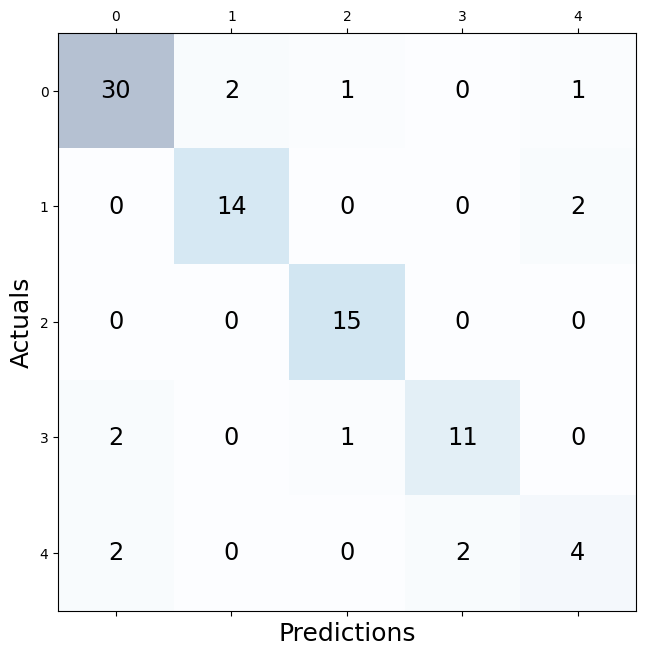

In [121]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(best_option_Decision_Tree['Confusion Matrix Test'], cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_option_Decision_Tree['Confusion Matrix Test'].shape[0]):

    for j in range(best_option_Decision_Tree['Confusion Matrix Test'].shape[1]):
        
        ax.text(x=j, y=i,s=best_option_Decision_Tree['Confusion Matrix Test'][i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix for Test in Decision Tree', fontsize=18)
plt.savefig('.\Decision_Tree_Confusion_Matrix_1.eps', format='eps')
plt.show()

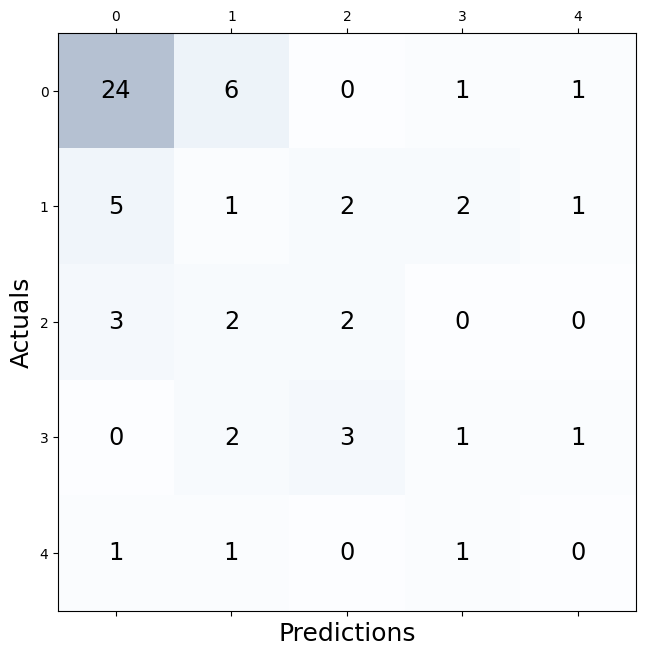

In [122]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(best_option_Decision_Tree['Confusion Matrix Client'], cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_option_Decision_Tree['Confusion Matrix Client'].shape[0]):

    for j in range(best_option_Decision_Tree['Confusion Matrix Client'].shape[1]):
        
        ax.text(x=j, y=i,s=best_option_Decision_Tree['Confusion Matrix Client'][i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix for Client in Decision Tree', fontsize=18)
plt.savefig('.\Decision_Tree_Confusion_Matrix_2.eps', format='eps')
plt.show()

##### 7.1.2 Precision

________________

In [123]:
print("Precision test:\n", best_option_Decision_Tree['Precision Test'])
print("Precision client:\n", best_option_Decision_Tree['Precision Client'])

Precision test:
 0.8114576599870718
Precision client:
 0.25926406926406925


##### 7.1.3 Recall

________________

In [124]:
print("Recall test:\n", best_option_Decision_Tree['Recall Test'])
print("Recall client:\n", best_option_Decision_Tree['Recall Client'])

Recall test:
 0.8086134453781512
Recall client:
 0.2538961038961039


##### 7.1.4 Accuracy

________________

In [125]:
print("Accuracy test:\n", best_option_Decision_Tree['Accuracy Test'])
print("Accuracy client:\n", best_option_Decision_Tree['Accuracy Client'])

Accuracy test:
 0.8505747126436781
Accuracy client:
 0.4666666666666667


### 7.2 Support Vector Machine Evaluation

______________________

In [126]:
best_option_SVM = SVM_evaluation.iloc[0]

print("Best Prameters:\n", best_option_SVM['Parameters'])

print("Gamma:\n", best_option_SVM['Gamma'])

print("Oversampling Method applied:\n", best_option_SVM['Oversampling'])

print("Feature Selection Method applied:\n", best_option_SVM['Feature Selection'])

print("Feature Selected:\n", best_option_SVM['Features'])

Best Prameters:
 {'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Gamma:
 0.01
Oversampling Method applied:
 doubling
Feature Selection Method applied:
 All
Feature Selected:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


##### 7.2.1 Confusion Matrix

________________

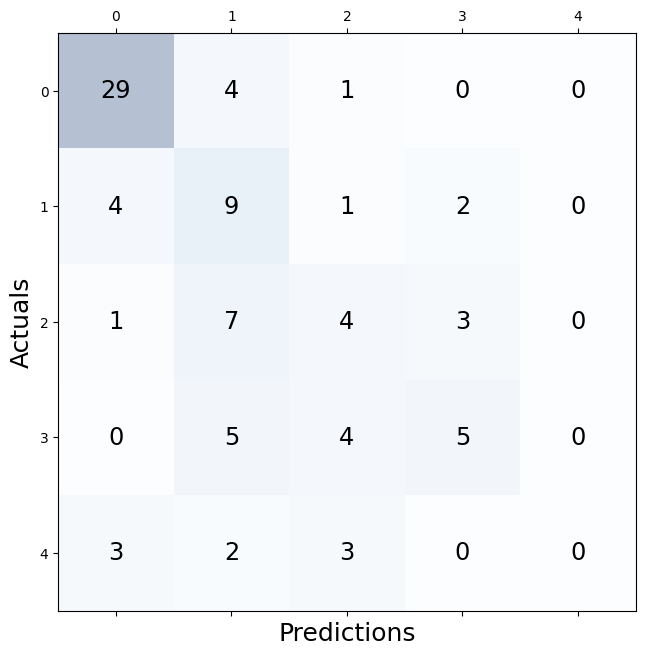

In [127]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(best_option_SVM['Confusion Matrix Test'], cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_option_SVM['Confusion Matrix Test'].shape[0]):

    for j in range(best_option_SVM['Confusion Matrix Test'].shape[1]):
        
        ax.text(x=j, y=i,s=best_option_SVM['Confusion Matrix Test'][i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix for Test in SVM', fontsize=18)
plt.savefig('.\SVM_Confusion_Matrix_1.eps', format='eps')
plt.show()

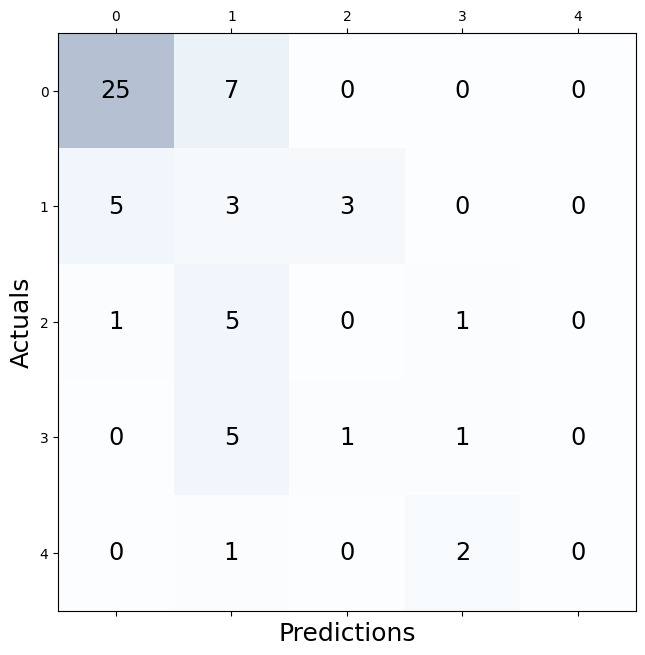

In [128]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(best_option_SVM['Confusion Matrix Client'], cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_option_SVM['Confusion Matrix Client'].shape[0]):

    for j in range(best_option_SVM['Confusion Matrix Client'].shape[1]):
        
        ax.text(x=j, y=i,s=best_option_SVM['Confusion Matrix Client'][i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix for Client in SVM', fontsize=18)
plt.savefig('.\SVM_Confusion_Matrix_2.eps', format='eps')
plt.show()

##### 7.2.2 Precision

________________

In [129]:
print("Precision test:\n", best_option_SVM['Precision Test'])
print("Precision client:\n", best_option_SVM['Precision Client'])

Precision test:
 0.38496188496188494
Precision client:
 0.2398617511520737


##### 7.2.3 Recall

________________

In [130]:
print("Recall test:\n", best_option_SVM['Recall Test'])
print("Recall client:\n", best_option_SVM['Recall Client'])

Recall test:
 0.40785014005602244
Recall client:
 0.2393668831168831


##### 7.2.4 Accuracy

________________

In [131]:
print("Accuracy test:\n", best_option_SVM['Accuracy Test'])
print("Accuracy client:\n", best_option_SVM['Accuracy Client'])

Accuracy test:
 0.5402298850574713
Accuracy client:
 0.48333333333333334


### 7.3 K-Nearest-Neighbors Evaluation

______________________

In [132]:
best_option_KNN = KNN_evaluation.iloc[0]

print("Best Prameters:\n", best_option_KNN['Parameters'])

print("Oversampling Method applied:\n", best_option_KNN['Oversampling'])

print("Feature Selection Method applied:\n", best_option_KNN['Feature Selection'])

print("Feature Selected:\n", best_option_KNN['Features'])

Best Prameters:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'cityblock', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Oversampling Method applied:
 doubling
Feature Selection Method applied:
 All
Feature Selected:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


##### 7.3.1 Confusion Matrix

________________

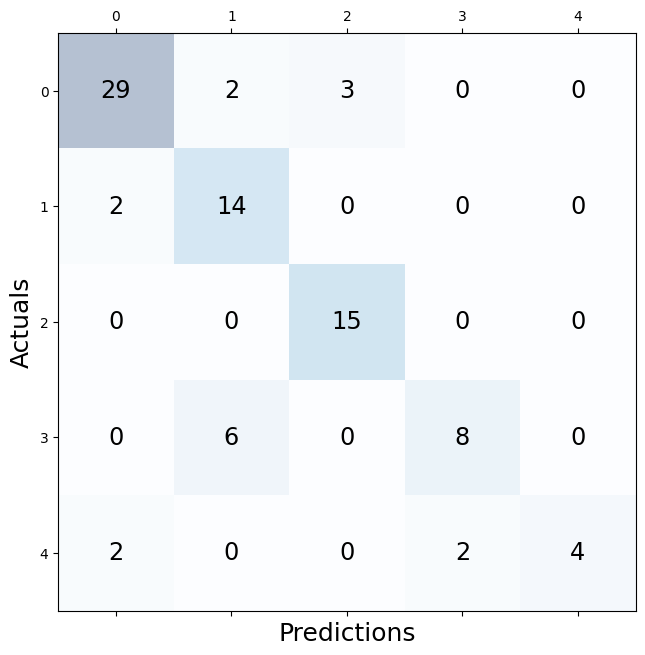

In [133]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(best_option_KNN['Confusion Matrix Test'], cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_option_KNN['Confusion Matrix Test'].shape[0]):

    for j in range(best_option_KNN['Confusion Matrix Test'].shape[1]):
        
        ax.text(x=j, y=i,s=best_option_KNN['Confusion Matrix Test'][i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix for Test in KNN', fontsize=18)
plt.savefig('.\KNN_Confusion_Matrix_1.eps', format='eps')
plt.show()

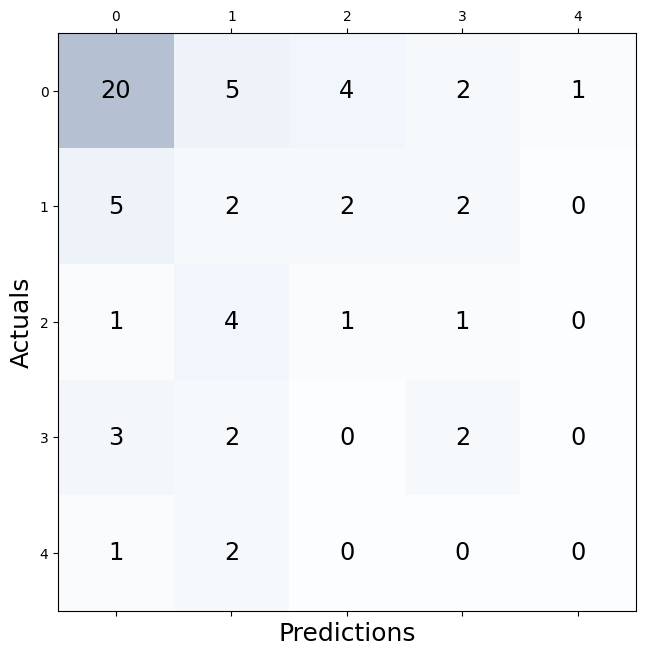

In [134]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(best_option_KNN['Confusion Matrix Client'], cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_option_KNN['Confusion Matrix Client'].shape[0]):

    for j in range(best_option_KNN['Confusion Matrix Client'].shape[1]):
        
        ax.text(x=j, y=i,s=best_option_KNN['Confusion Matrix Client'][i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix for Client in KNN', fontsize=18)
plt.savefig('.\KNN_Confusion_Matrix_2.eps', format='eps')
plt.show()

##### 7.3.2 Precision

________________

In [135]:
print("Precision test:\n", best_option_KNN['Precision Test'])
print("Precision client:\n", best_option_KNN['Precision Client'])

Precision test:
 0.8296969696969697
Precision client:
 0.24571428571428572


##### 7.3.3 Recall

________________

In [136]:
print("Recall test:\n", best_option_KNN['Recall Test'])
print("Recall client:\n", best_option_KNN['Recall Client'])

Recall test:
 0.759873949579832
Recall client:
 0.2470779220779221


##### 7.3.4 Accuracy

________________

In [137]:
print("Accuracy test:\n", best_option_KNN['Accuracy Test'])
print("Accuracy client:\n", best_option_KNN['Accuracy Client'])

Accuracy test:
 0.8045977011494253
Accuracy client:
 0.4166666666666667


# 9. References
<a id="1">[1]</a>
Anggoro, Dimas Aryo and Kurnia, Naqshauliza Devi (2020). 
Comparison of accuracy level of support vector machine (SVM) and K-nearest neighbors (KNN) algorithms in predicting heart disease
International Journal, 8(5), 1689--1694.

<a id="2">[2]</a>
https://www.kaggle.com/code/zawlinnnaing/svm-for-multiclass-classification